<a href="https://colab.research.google.com/github/suafle/obs_astrophysics/blob/master/homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

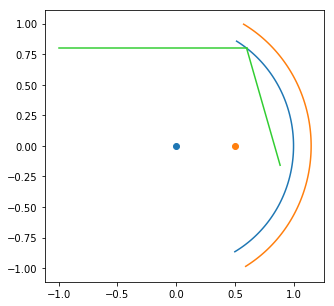

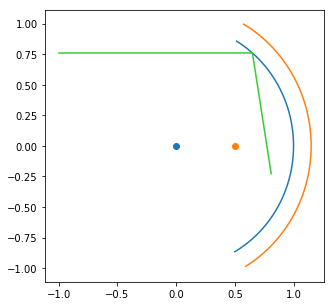

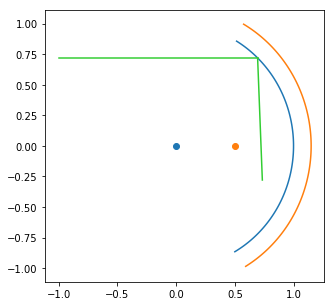

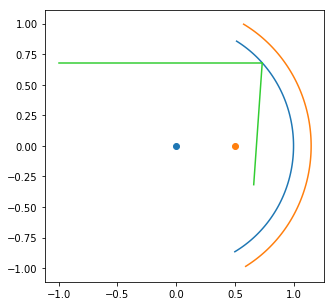

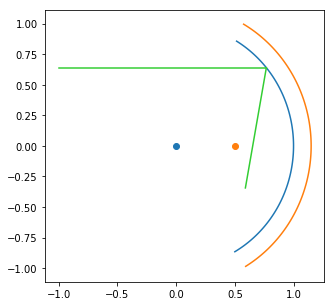

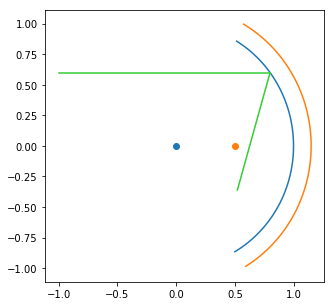

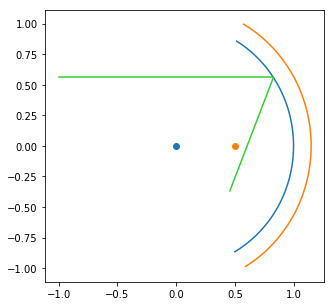

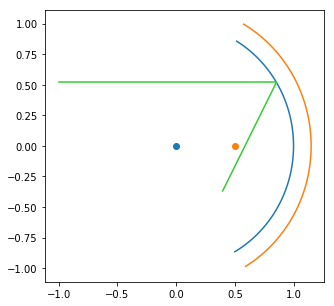

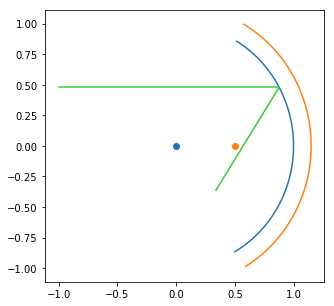

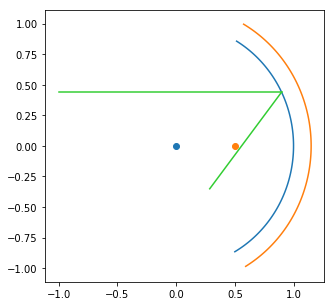

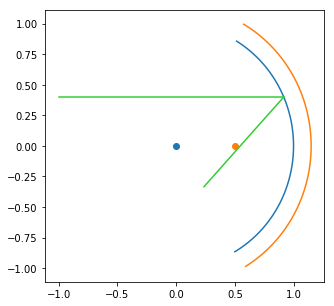

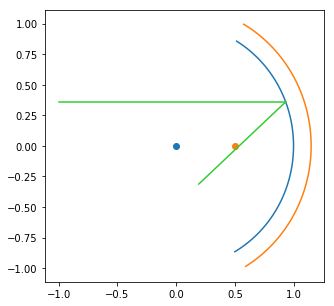

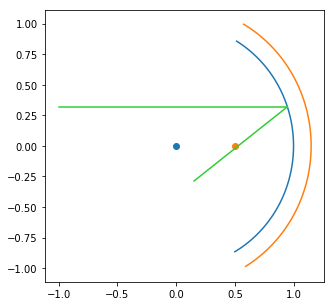

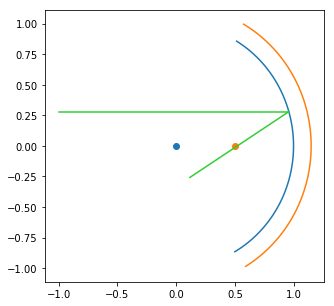

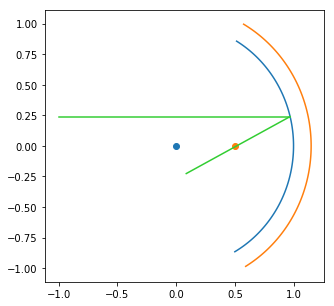

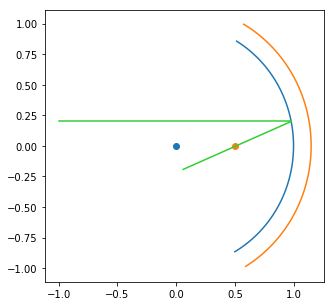

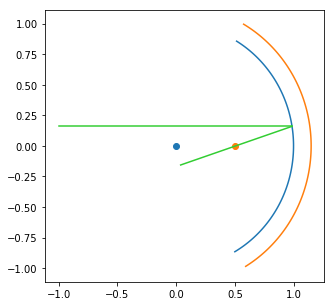

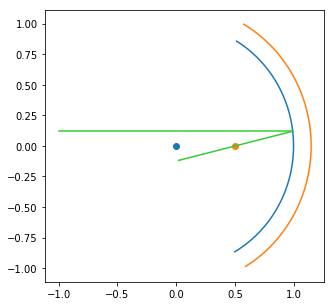

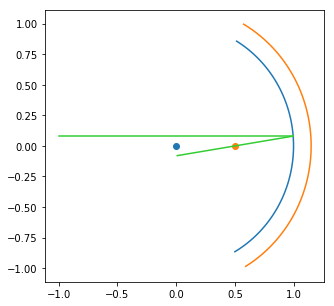

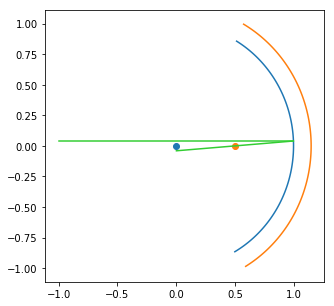

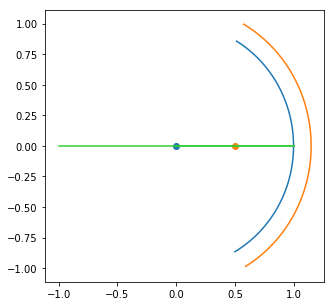

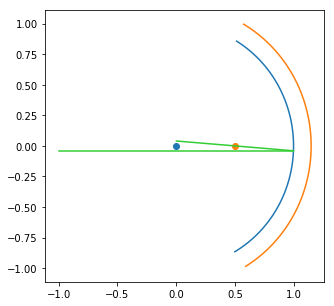

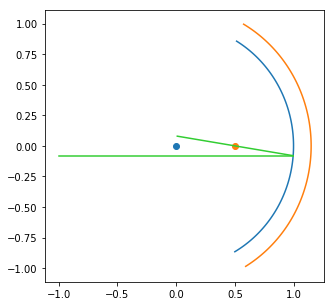

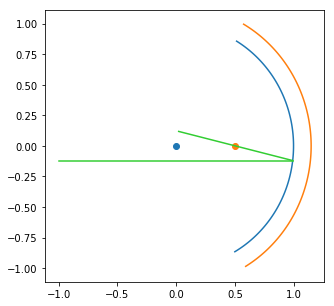

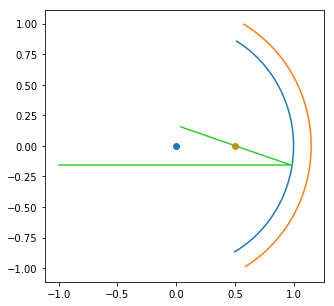

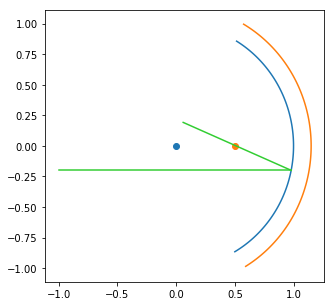

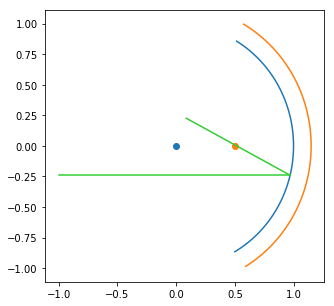

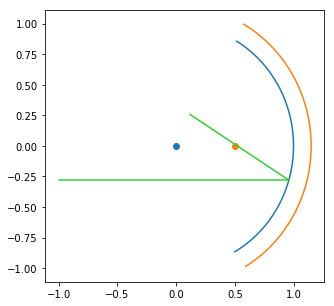

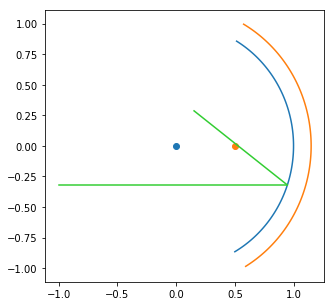

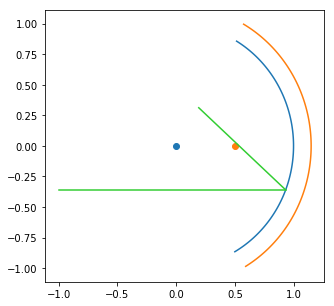

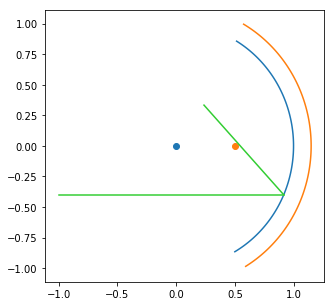

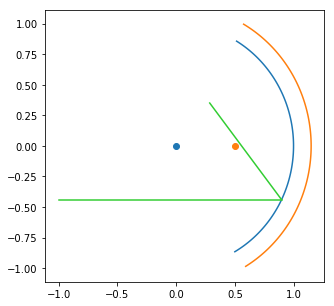

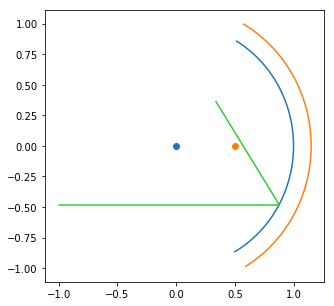

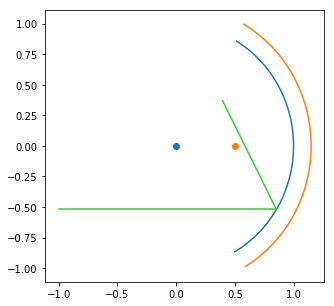

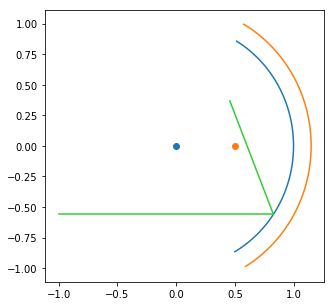

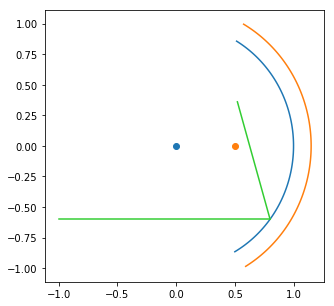

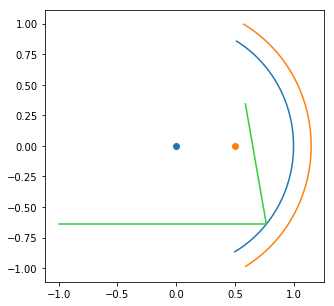

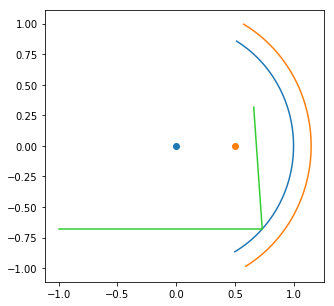

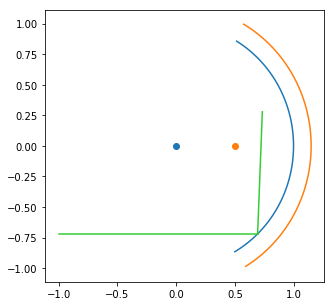

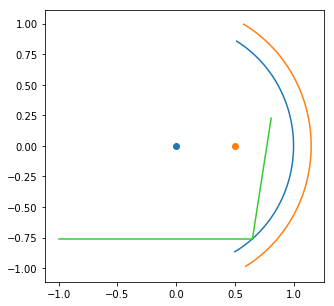

In [4]:
#Spherical mirror
a = np.arange(-180,181,1)*(np.pi/180.) #from -180 deg to 180 deg in rad
x = np.cos(a)
y = np.sin(a)

delta = -0.04
for dy in np.arange(0.8,-0.8,delta):
  dx = np.sqrt(1-dy*dy)
  plt.rcParams["figure.figsize"] = (5,5)
  plt.scatter([-1,1],[-1,1],c='white')
  ii = np.arange(120,240,1)
  plt.plot(x[ii],y[ii])
  plt.plot(x[360-ii]*1.15,y[360-ii]*1.15)
  plt.scatter([0],[0])
  plt.scatter([0.5],[0])
  #aa=2.*np.arcsin(dy)
  plt.plot([-1,dx],[dy,dy],color='limegreen') #incident ray
  tangent = [np.sqrt(1-(dy-delta)*(dy-delta))-np.sqrt(1-(dy+delta)*(dy+delta)),(dy-delta)-(dy + delta)] # tg[x,y]
  tangent = tangent/np.sqrt(tangent[0]**2 + tangent[1]**2) #normalized tangent
  alpha = np.arctan(tangent[0]/tangent[1]) #angle between tangent and incoming horizontal ray
  reflected = [-np.cos(2.*alpha) + dx,np.sin(2.*alpha)+dy] #refelcted ray
  plt.plot([np.sqrt(1-dy*dy),reflected[0]],[dy,reflected[1]],color='limegreen')
  plt.show()
  plt.close()
  """
  if(i > 0):  
    #tangent=[np.mean([x[i:i+1],x[i-1:i]]),np.mean([y[i:i+1],y[i-1:i]])]
    tangent=[x[i:i+1][0]-x[i-1:i][0],y[i:i+1][0]-y[i-1:i][0]]
    plt.scatter([-1,x[i],tangent[0]],[y[i],y[i],tangent[1]]) #,line=2
    plt.plot([-1,np.sqrt(1e0-dy*dy),np.sqrt(1e0-dy*dy)-np.arccos(aa)],[dy,dy,dy-np.arcsin(aa)])#,line=2)
  i=int(round(np.arcsin(dy)*(180./np.pi))+180)
  tangent=[np.mean([x[i:i+1],x[i-1:i]]),np.mean([y[i:i+1],y[i-1:i]])]
  tangent=tangent/np.sqrt(tangent[0]**2 + tangent[1]**2)
  alpha=np.arctan(tangent[0]/tangent[1]) #; Angle between tangent in incoming horizontal ray
  tangent=[-np.cos(2.*alpha)+x[i],np.sin(2.*alpha)+dy] #; Reflected ray
  plt.plot([-1,x[i],tangent[0]],[y[i],y[i],tangent[1]]) #,line=2,col=0
  plt.show()
  plt.close()
  """

"\nfor dy in np.arange(0.8,-0.8,delta):\n  plt.scatter([0],[0])\n  plt.scatter([0.5],[0])\n  #aa=2.*np.arcsin(dy)\n  plt.plot([-1,np.sqrt(1-dy*dy)],[dy,dy],color='limegreen') #incident ray\n  tangent = [np.sqrt(1-(dy-delta)*(dy-delta))-np.sqrt(1-(dy+delta)*(dy+delta)),(dy-delta)-(dy + delta)] # tg[x,y]\n  tangent = tangent/np.sqrt(tangent[0]**2 + tangent[1]**2) #normalized tangent\n  alpha = np.arctan(tangent[0]/tangent[1]) #angle between tangent and incoming horizontal ray\n  reflected = [-np.cos(2.*alpha) + x[i],np.sin(2.*alpha)+dy] #refelcted ray\n  plt.plot([np.sqrt(1-dy*dy),reflected[0]],[dy,reflected[1]],color='limegreen')\n  #plt.plot([-1,np.sqrt(1e0-dy*dy),np.sqrt(1e0-dy*dy)-np.cos(aa)],[dy,dy,dy-np.sin(aa)]) #,line=2,col=0\n  plt.show()\n  plt.close()\n"

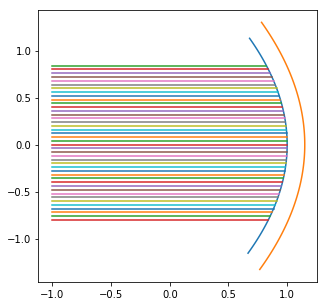

In [20]:
#Parabolic mirror
a = np.arange(-180,181,1)*(np.pi/180.) #from -180 deg to 180 deg in rad

ii = np.arange(-60,60,1)*(np.pi/180.)
r = 2./(1.+np.cos(ii))
x = r*np.cos(ii)
y = r*np.sin(ii)

plt.rcParams["figure.figsize"] = (5,5)
plt.scatter([-1,1],[-1,1],color='white')
plt.plot(x,y)
plt.plot(x*1.15,y*1.15)

delta = -0.04
dy = np.arange(0.84,-0.84,delta)
angles = 2*np.arctan(dy/2)
dx = (2./(1 + np.cos(angles)))*np.cos(angles)
tangentx = 


for i,j in zip(dx,dy):
  plt.plot([-1,i],[j,j])
  #plt.close()

"""
for dy in np.arange(0.8,-0.8,delta):
  plt.scatter([0],[0])
  plt.scatter([0.5],[0])
  #aa=2.*np.arcsin(dy)
  plt.plot([-1,np.sqrt(1-dy*dy)],[dy,dy],color='limegreen') #incident ray
  tangent = [np.sqrt(1-(dy-delta)*(dy-delta))-np.sqrt(1-(dy+delta)*(dy+delta)),(dy-delta)-(dy + delta)] # tg[x,y]
  tangent = tangent/np.sqrt(tangent[0]**2 + tangent[1]**2) #normalized tangent
  alpha = np.arctan(tangent[0]/tangent[1]) #angle between tangent and incoming horizontal ray
  reflected = [-np.cos(2.*alpha) + x[i],np.sin(2.*alpha)+dy] #refelcted ray
  plt.plot([np.sqrt(1-dy*dy),reflected[0]],[dy,reflected[1]],color='limegreen')
  #plt.plot([-1,np.sqrt(1e0-dy*dy),np.sqrt(1e0-dy*dy)-np.cos(aa)],[dy,dy,dy-np.sin(aa)]) #,line=2,col=0
  plt.show()
  plt.close()
"""